In [5]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import CMR_IA as cmr
import scipy as sp
from matplotlib.lines import Line2D

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
SAVEFIG = True

## Load Stimuli and Semantic Matrix

In [6]:
with open("simu3_data/simu3_design.pkl", "rb") as inp:
    df = pickle.load(inp)
# df = df.loc[df.session < 300]  # for test
df

,position,session,testidx,lag,type,study_itemno1,study_itemno2,test_itemno1,test_itemno2
0,0,0,147,0,no_fit,708,1244,664,972
1,1,0,151,0,no_fit,751,680,339,1537
2,2,0,156,0,no_fit,823,1591,1298,1393
3,3,0,17,0,no_fit,880,1325,226,1545
4,4,0,90,0,no_fit,51,1505,603,433
...,...,...,...,...,...,...,...,...,...
159995,155,999,151,4,single_new,1631,1566,1403,-1
159996,156,999,154,2,single_old,815,806,1147,-1
159997,157,999,153,4,pair_old,678,1352,1331,542
159998,158,999,152,6,single_old,1021,1321,746,-1


In [7]:
s_mat = np.load("../wordpools/ltp_FR_similarity_matrix.npy")

## Run CMR-IA

In [8]:
# define parameters
params = cmr.make_default_params()
params.update(
    beta_enc=0.2,
    beta_cue=0.5,
    beta_rec_post=0.3,
    s_fc=0.4,
    gamma_fc=0.65,
    c_thresh_itm=0.762,
    c_thresh_assoc=0.851,
    use_new_context=True,
)
params

{'beta_enc': 0.2,
 'beta_rec': 0.5,
 'beta_cue': 0.5,
 'beta_rec_post': 0.3,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.4,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 5,
 'alpha': 1,
 'lamb': 0.5,
 'c_thresh': 0.5,
 'c_thresh_itm': 0.762,
 'c_thresh_assoc': 0.851,
 'd_assoc': 1,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'use_new_context': True,
 'psi_s': 0,
 'psi_c': 1,
 'c_s': 0,
 'thresh_sigma': 0,
 'ban_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'a': 2800,
 'b': 20,
 'gamma_fc': 0.65,
 'gamma_cf': 0.5}

In [9]:
# run the model
df_simu = cmr.run_conti_recog_multi_sess(params, df, s_mat, mode="Hockley")
df_simu

100%|██████████| 1000/1000 [02:38<00:00,  6.31it/s]

CMR Time: 158.7335958480835


,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim
0,0,0,708,1244,664,972,0.0,0.052135,0.217435
1,0,1,751,680,339,1537,0.0,36.118767,0.544472
2,0,2,823,1591,1298,1393,0.0,38.261642,0.547354
3,0,3,880,1325,226,1545,0.0,77.820587,0.582852
4,0,4,51,1505,603,433,0.0,21.298655,0.518063
...,...,...,...,...,...,...,...,...,...
159995,999,155,1631,1566,1403,-1,0.0,438.938995,0.669349
159996,999,156,815,806,1147,-1,1.0,2788.544678,0.762205
159997,999,157,678,1352,1331,542,1.0,229.512985,0.887071
159998,999,158,1021,1321,746,-1,1.0,695.423767,0.831643


In [10]:
# merge to get more info
df_simu = df_simu.merge(df, on=["session", "position", "study_itemno1", "study_itemno2", "test_itemno1", "test_itemno2"])
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,testidx,lag,type
0,0,0,708,1244,664,972,0.0,0.052135,0.217435,147,0,no_fit
1,0,1,751,680,339,1537,0.0,36.118767,0.544472,151,0,no_fit
2,0,2,823,1591,1298,1393,0.0,38.261642,0.547354,156,0,no_fit
3,0,3,880,1325,226,1545,0.0,77.820587,0.582852,17,0,no_fit
4,0,4,51,1505,603,433,0.0,21.298655,0.518063,90,0,no_fit
...,...,...,...,...,...,...,...,...,...,...,...,...
159995,999,155,1631,1566,1403,-1,0.0,438.938995,0.669349,151,4,single_new
159996,999,156,815,806,1147,-1,1.0,2788.544678,0.762205,154,2,single_old
159997,999,157,678,1352,1331,542,1.0,229.512985,0.887071,153,4,pair_old
159998,999,158,1021,1321,746,-1,1.0,695.423767,0.831643,152,6,single_old


In [11]:
df_simu.to_pickle("simu3_data/simu3_result.pkl")

## Analysis

In [12]:
with open("simu3_data/simu3_result.pkl", "rb") as inp:
    df_simu = pickle.load(inp)

In [13]:
# check the csim of each condition
df_simu.groupby(["type", "lag"]).csim.mean()

type        lag
no_fit      0      0.550528
pair_new    2      0.832949
            4      0.830048
            6      0.830229
            8      0.828965
            16     0.828288
pair_old    2      0.864408
            4      0.861308
            6      0.860493
            8      0.860815
            16     0.859366
single_new  2      0.531525
            4      0.530613
            6      0.531926
            8      0.531976
            16     0.531011
single_old  2      0.796281
            4      0.787399
            6      0.785166
            8      0.785474
            16     0.781094
Name: csim, dtype: float64

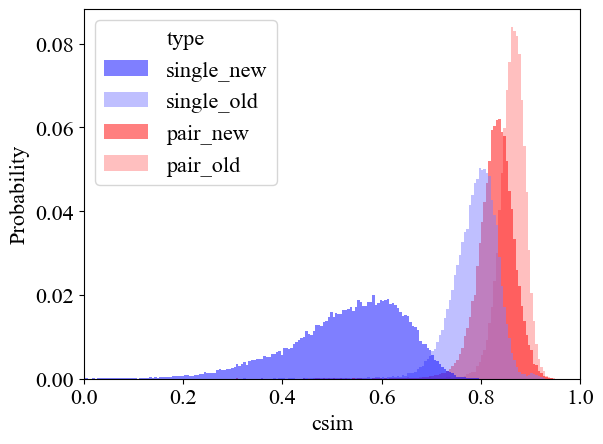

In [14]:
# check csim distribution
sns.histplot(
    data=df_simu,
    x="csim",
    hue="type",
    hue_order=["single_new", "single_old", "pair_new", "pair_old"],
    palette=[[0, 0, 1], [0.5, 0.5, 1], [1, 0, 0], [1, 0.5, 0.5]],
    stat="probability",
    binwidth=0.005,
    common_norm=False,
    edgecolor=None,
    alpha=0.5,
)
plt.xlim(0, 1)
plt.show()

### Yes Rate

In [15]:
# session-wise, calculate the yes_rate for each condition
df_sess_laggp = df_simu.groupby(["session", "type", "lag"]).s_resp.agg(["count", "sum", "mean"]).reset_index()
df_sess_laggp.rename(columns={"mean": "yes_rate"}, inplace=True)
df_sess_laggp["yes_rate_adj"] = (df_sess_laggp["sum"] + 0.5) / (df_sess_laggp["count"] + 1)
df_sess_laggp["z_yes_rate"] = sp.stats.norm.ppf(df_sess_laggp["yes_rate_adj"])
df_sess_laggp

,session,type,lag,count,sum,yes_rate,yes_rate_adj,z_yes_rate
0,0,no_fit,0,16,1.0,0.062500,0.088235,-1.351702
1,0,pair_new,2,4,2.0,0.500000,0.500000,0.000000
2,0,pair_new,4,5,0.0,0.000000,0.083333,-1.382994
3,0,pair_new,6,12,3.0,0.250000,0.269231,-0.615141
4,0,pair_new,8,9,4.0,0.444444,0.450000,-0.125661
...,...,...,...,...,...,...,...,...
20984,999,single_old,2,9,7.0,0.777778,0.750000,0.674490
20985,999,single_old,4,9,7.0,0.777778,0.750000,0.674490
20986,999,single_old,6,6,6.0,1.000000,0.928571,1.465234
20987,999,single_old,8,10,8.0,0.800000,0.772727,0.747859


In [16]:
# collapse across session to get hit rate and false alarm rate
df_laggp = df_sess_laggp.groupby(["type", "lag"]).yes_rate.mean().to_frame(name="yes_rate").reset_index()
df_laggp["no_rate"] = 1 - df_laggp["yes_rate"]
df_laggp

,type,lag,yes_rate,no_rate
0,no_fit,0,0.111700,0.888300
1,pair_new,2,0.297512,0.702488
2,pair_new,4,0.274719,0.725281
3,pair_new,6,0.275503,0.724497
4,pair_new,8,0.270164,0.729836
5,pair_new,16,0.253864,0.746136
6,pair_old,2,0.762092,0.237908
7,pair_old,4,0.712344,0.287656
8,pair_old,6,0.703784,0.296216
9,pair_old,8,0.702477,0.297523


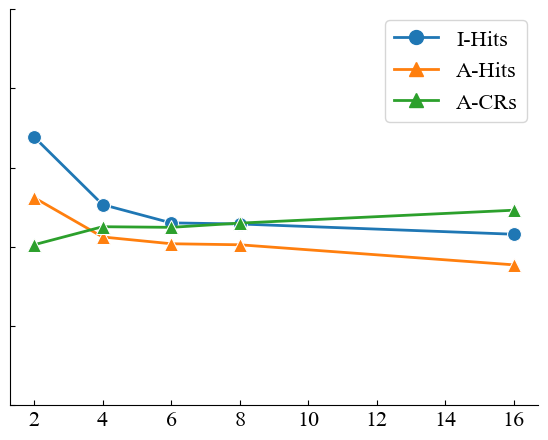

In [17]:
# plot
fig, ax = plt.subplots(figsize=(6, 4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="y", direction="in")
ax.tick_params(axis="x", direction="in")
sns.lineplot(data=df_laggp.loc[df_laggp.type == "single_old"], x="lag", y="yes_rate", linewidth=2, marker="o", markersize=10, label="I-Hits")
sns.lineplot(data=df_laggp.loc[df_laggp.type == "pair_old"], x="lag", y="yes_rate", linewidth=2, marker="^", markersize=10, label="A-Hits")
sns.lineplot(data=df_laggp.loc[df_laggp.type == "pair_new"], x="lag", y="no_rate", linewidth=2, marker="^", markersize=10, label="A-CRs")
plt.ylim([0.5, 1])
plt.xlabel("Test Lag")
plt.ylabel("Proportion Correct")
plt.xticks(ticks=np.arange(2, 18, 2))
legend_elements = [
    Line2D([0], [0], color=sns.color_palette()[0], lw=2, marker="o", markersize=10, linestyle="-", label="I-Hits"),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2, marker="^", markersize=10, linestyle="-", label="A-Hits"),
    Line2D([0], [0], color=sns.color_palette()[2], lw=2, marker="^", markersize=10, linestyle="-", label="A-CRs"),
]
plt.legend(handles=legend_elements)

if SAVEFIG:
    plt.tick_params(labelleft=False)
    ax.set(xlabel=None, ylabel=None)
    plt.savefig("simu3_fig/simu3_hr.pdf")

### d-prime

In [18]:
# session-wise, get dprime for item for each lag
df_item = df_sess_laggp.loc[df_sess_laggp.type.isin(["single_old", "single_new"])].copy()
df_item = pd.pivot_table(df_item, index=["session", "lag"], columns="type", values="z_yes_rate").reset_index()
df_item.rename(columns={"single_old": "z_hr", "single_new": "z_far"}, inplace=True)
df_item["dprime"] = df_item["z_hr"] - df_item["z_far"]
df_item

type,session,lag,z_far,z_hr,dprime
0,0,2,-1.593219,0.967422,2.560640
1,0,4,-1.281552,1.382994,2.664546
2,0,6,-1.644854,0.674490,2.319343
3,0,8,-1.593219,1.036433,2.629652
4,0,16,-1.593219,0.674490,2.267709
...,...,...,...,...,...
4995,999,2,-1.802743,0.674490,2.477233
4996,999,4,-1.465234,0.674490,2.139724
4997,999,6,-1.465234,1.465234,2.930468
4998,999,8,-1.465234,0.747859,2.213092


In [19]:
# session-wise, get dprime for pair for each lag
df_pair = df_sess_laggp.loc[df_sess_laggp.type.isin(["pair_old", "pair_new"])].copy()
df_pair = pd.pivot_table(df_pair, index=["session", "lag"], columns="type", values="z_yes_rate").reset_index()
df_pair.rename(columns={"pair_old": "z_hr", "pair_new": "z_far"}, inplace=True)
df_pair["dprime"] = df_pair["z_hr"] - df_pair["z_far"]
df_pair

type,session,lag,z_far,z_hr,dprime
0,0,2,0.000000,0.366106,0.366106
1,0,4,-1.382994,0.385320,1.768315
2,0,6,-0.615141,0.366106,0.981247
3,0,8,-0.125661,0.887147,1.012808
4,0,16,-0.366106,0.488776,0.854883
...,...,...,...,...,...
4995,999,2,-0.282216,0.366106,0.648323
4996,999,4,-0.366106,0.210428,0.576535
4997,999,6,-0.488776,0.674490,1.163266
4998,999,8,-0.210428,0.000000,0.210428


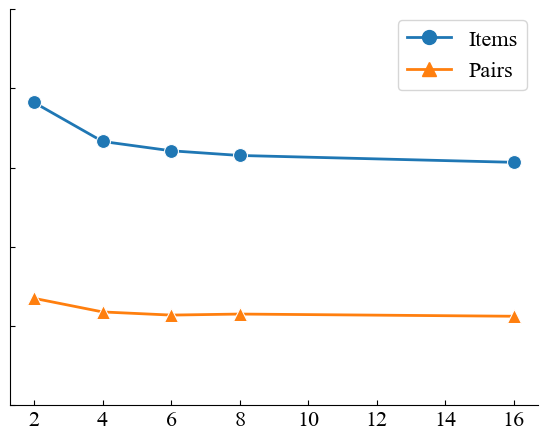

In [20]:
# plot
fig, ax = plt.subplots(figsize=(6, 4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="y", direction="in")
ax.tick_params(axis="x", direction="in")
sns.lineplot(data=df_item, x="lag", y="dprime", linewidth=2, marker="o", markersize=10, label="Items", errorbar=None)
sns.lineplot(data=df_pair, x="lag", y="dprime", linewidth=2, marker="^", markersize=10, label="Pairs", errorbar=None)
plt.ylabel("$d^'$")
plt.xlabel("Test Lag")
plt.ylim([0.5, 3])
plt.xticks(ticks=np.arange(2, 18, 2))

legend_elements = [
    Line2D([0], [0], color=sns.color_palette()[0], lw=2, marker="o", markersize=10, linestyle="-", label="Items"),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2, marker="^", markersize=10, linestyle="-", label="Pairs"),
]
plt.legend(handles=legend_elements)

if SAVEFIG:
    ax.set(xlabel=None, ylabel=None)
    plt.tick_params(labelleft=False)
    plt.savefig("simu3_fig/simu3_dprime.pdf")

### Error Check

In [21]:
# get the vectors
I_hr = df_laggp.loc[df_laggp.type == "single_old", "yes_rate"].to_numpy()
I_far = np.mean(df_laggp.loc[df_laggp.type == "single_new", "yes_rate"].astype(float))
A_hr = df_laggp.loc[df_laggp.type == "pair_old", "yes_rate"].to_numpy()
A_far = df_laggp.loc[df_laggp.type == "pair_new", "yes_rate"].to_numpy()
# I_dprime = df_dprime['I_dprime'].to_numpy()
# A_dprime = df_dprime['A_dprime'].to_numpy()

# ground truth
I_hr_gt = np.array([0.865, 0.811, 0.752, 0.746, 0.708])
I_far_gt = 0.15  # 0.12
A_hr_gt = np.array([0.843, 0.787, 0.720, 0.735, 0.646])
A_far_gt = np.array([0.406, 0.371, 0.285, 0.259, 0.202])
# I_dprime_gt = np.array([2.31, 2.05, 1.85, 1.84, 1.68])
# A_dprime_gt = np.array([1.36, 1.29, 1.37, 1.58, 1.39])

# calculate the error
pow_err = (
    np.mean(np.power(I_hr - I_hr_gt, 2)) + np.mean(np.power(A_hr - A_hr_gt, 2)) + np.power(I_far - I_far_gt, 2) * 5 + np.mean(np.power(A_far - A_far_gt, 2))
)
abs_err = np.mean(np.abs(I_hr - I_hr_gt)) + np.mean(np.abs(A_hr - A_hr_gt)) + np.abs(I_far - I_far_gt) * 5 + np.mean(np.abs(A_far - A_far_gt))
err = pow_err + abs_err / 10
err

0.20638514272159725

In [22]:
I_hr, I_far, A_hr, A_far

(array([0.83873482, 0.7532179 , 0.73012779, 0.7287361 , 0.71577098]),
 0.0013203141097173194,
 array([0.76209188, 0.71234356, 0.70378391, 0.70247667, 0.67711799]),
 array([0.29751236, 0.27471942, 0.27550302, 0.27016353, 0.25386369]))